### Slice Seismic in AWS and Plot
This notebook includes functions to read and plot seismic data from AWS S3.

We converted SEG-Y file to a bricked storage format using the `zarr` library. This allows
fast random access to the file while minimizing bandwidth requirements.

We first start by importing functions to log into S3, and to slice and plot data.

In [1]:
from os import getenv
import zarr
from seismic_inversion_2021.convenience import get_inline, get_xline, get_z_slice, plot_slice


S3 requires an access key and an access secret, and since nobody wants to
include a key and a secret in a notebook, we used ```python-dotenv``` to keep this
in a `.env` file together with the scripts. If the `.env` file is configured correctly
the next cell will load that into the current notebook kernel.

In [2]:
%reload_ext dotenv
%dotenv

aws_key = getenv('AWS_ACCESS_KEY_ID')
aws_secret = getenv('AWS_SECRET_ACCESS_KEY')

s3_config = {'key': aws_key,
             'secret': aws_secret}

Once the S3 credentials are configured, now we can access the zarr data store using
a simplecache aka. Least Recently Used (LRU) Cache. We also print the structure of the
zarr file using `ipytree`.

In [3]:
s3_path = r'simplecache::s3://gsh-competition-data/poseidon/seismic/zarr/Poseidon3D_Final_PSDM_Decimated_vels.zarr'
s3_zarr_root = zarr.open_consolidated(s3_path, storage_options={'s3': s3_config})

s3_zarr_root.tree(expand=True)

Tree(nodes=(Node(disabled=True, name='/', nodes=(Node(disabled=True, name='metadata', nodes=(Node(disabled=Tru…

The convenience functions below extract user defined inline, xline, and time slice from the large
`zarr` array with coordinates. Then the `plot_xxx` convenience functions are used to
create simple plots using `matplotlib`. The plotting functions return the `x_fig` variable
in the form of a tuple `(fig_obj, ax_obj)`so participants can modify the figures later if needed.

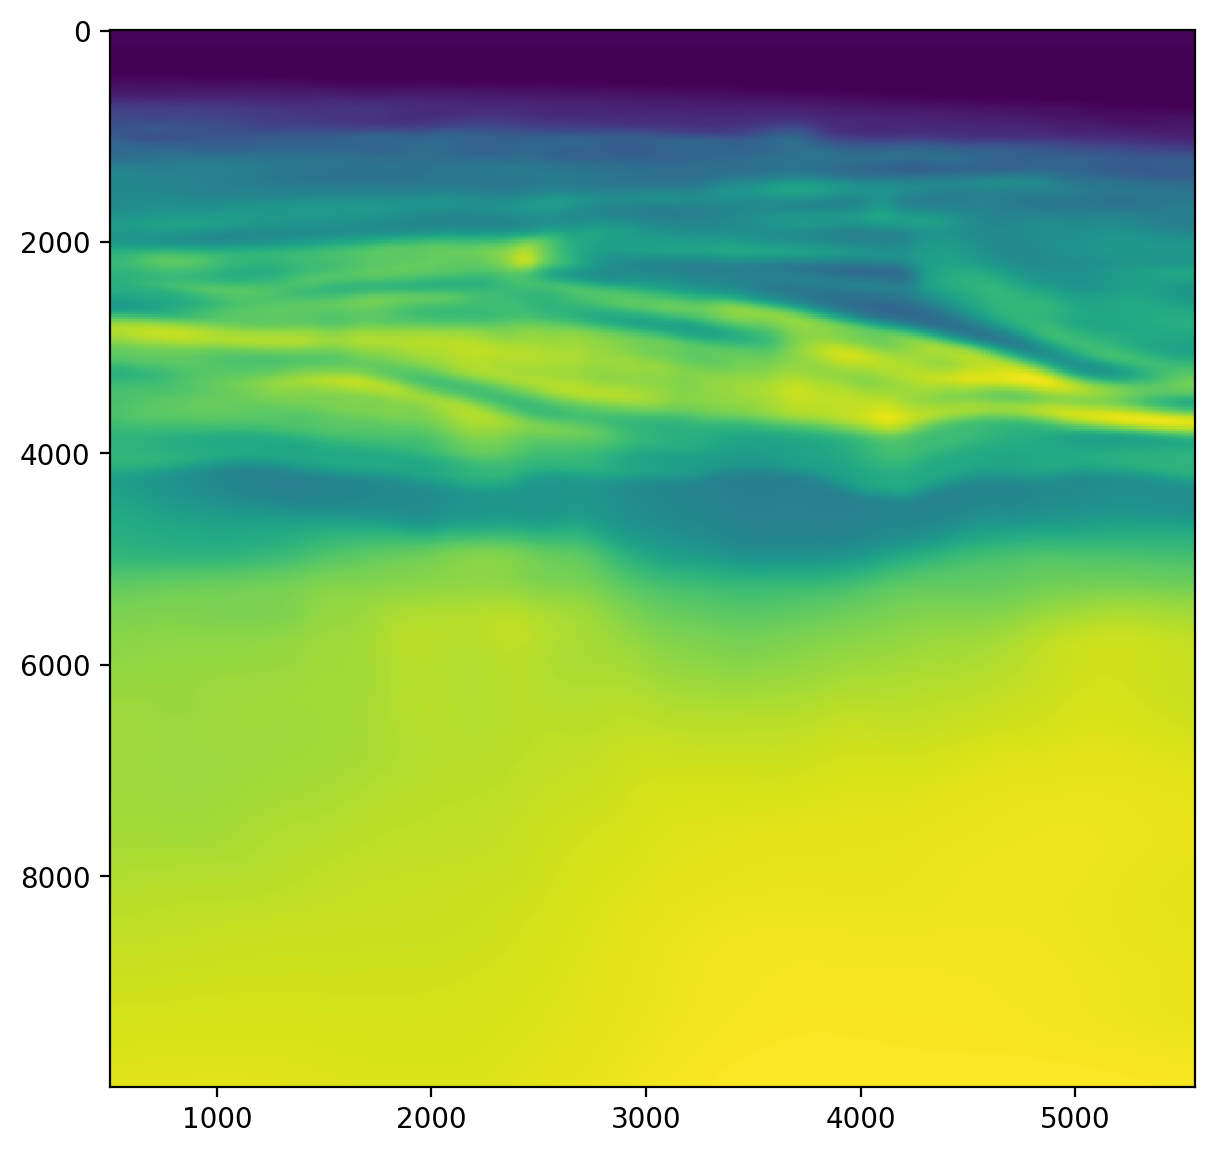

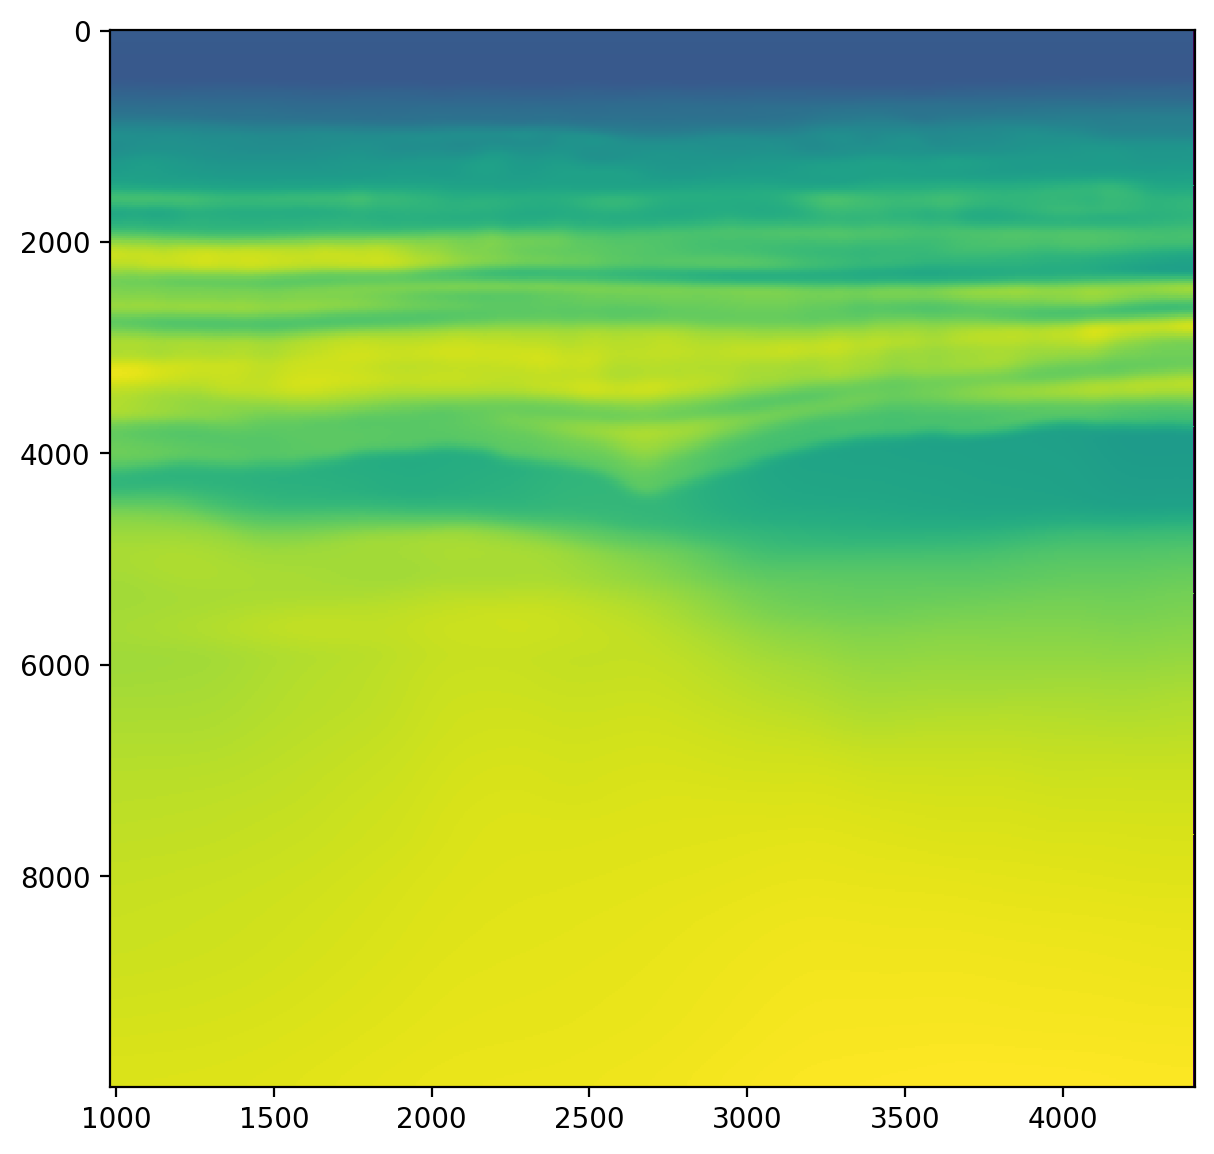

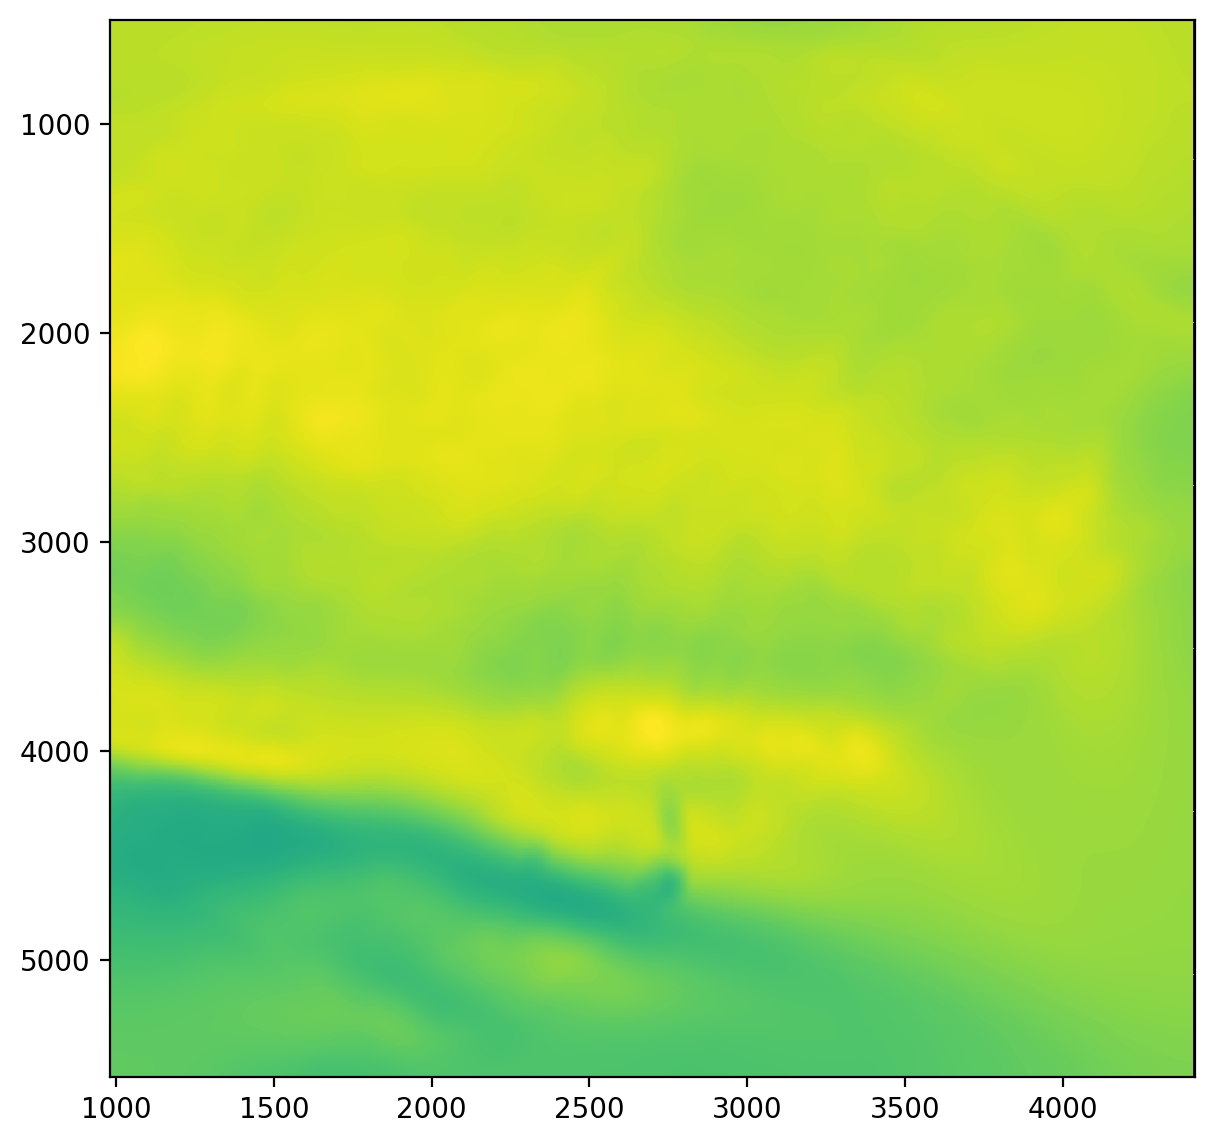

In [4]:
draw_il, draw_xl, draw_z = 2540, 2640, 3000

il_x, il_y, il_data = get_inline(s3_zarr_root, draw_il)
xl_x, xl_y, xl_data = get_xline(s3_zarr_root, draw_xl)
z_x, z_y, z_data = get_z_slice(s3_zarr_root, draw_z)

il_fig = plot_slice(il_x, il_y, il_data)
xl_fig = plot_slice(xl_x, xl_y, xl_data)
z_fig = plot_slice(z_x, z_y, z_data)

